In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv(r"water_potability.csv")   

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df.shape

(3276, 10)

In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df.isna().sum(axis=1)


0       1
1       1
2       1
3       0
4       0
       ..
3271    0
3272    2
3273    1
3274    1
3275    1
Length: 3276, dtype: int64

In [10]:
df.isna().sum(axis=1).value_counts()


0    2011
1    1105
2     151
3       9
dtype: int64

In [11]:
for column in df.columns:
    missing_values = df[column].isna().sum()
    print(f"Column '{column}': {missing_values} missing values")

# Print a message for columns with missing values
columns_with_missing_values = df.columns[df.isna().any()].tolist()
if columns_with_missing_values:
    print("\nColumns with missing values:", ', '.join(columns_with_missing_values))
    print("Consider handling missing values in these columns.")
else:
    print("\nNo missing values in any column.")


Column 'ph': 491 missing values
Column 'Hardness': 0 missing values
Column 'Solids': 0 missing values
Column 'Chloramines': 0 missing values
Column 'Sulfate': 781 missing values
Column 'Conductivity': 0 missing values
Column 'Organic_carbon': 0 missing values
Column 'Trihalomethanes': 162 missing values
Column 'Turbidity': 0 missing values
Column 'Potability': 0 missing values

Columns with missing values: ph, Sulfate, Trihalomethanes
Consider handling missing values in these columns.


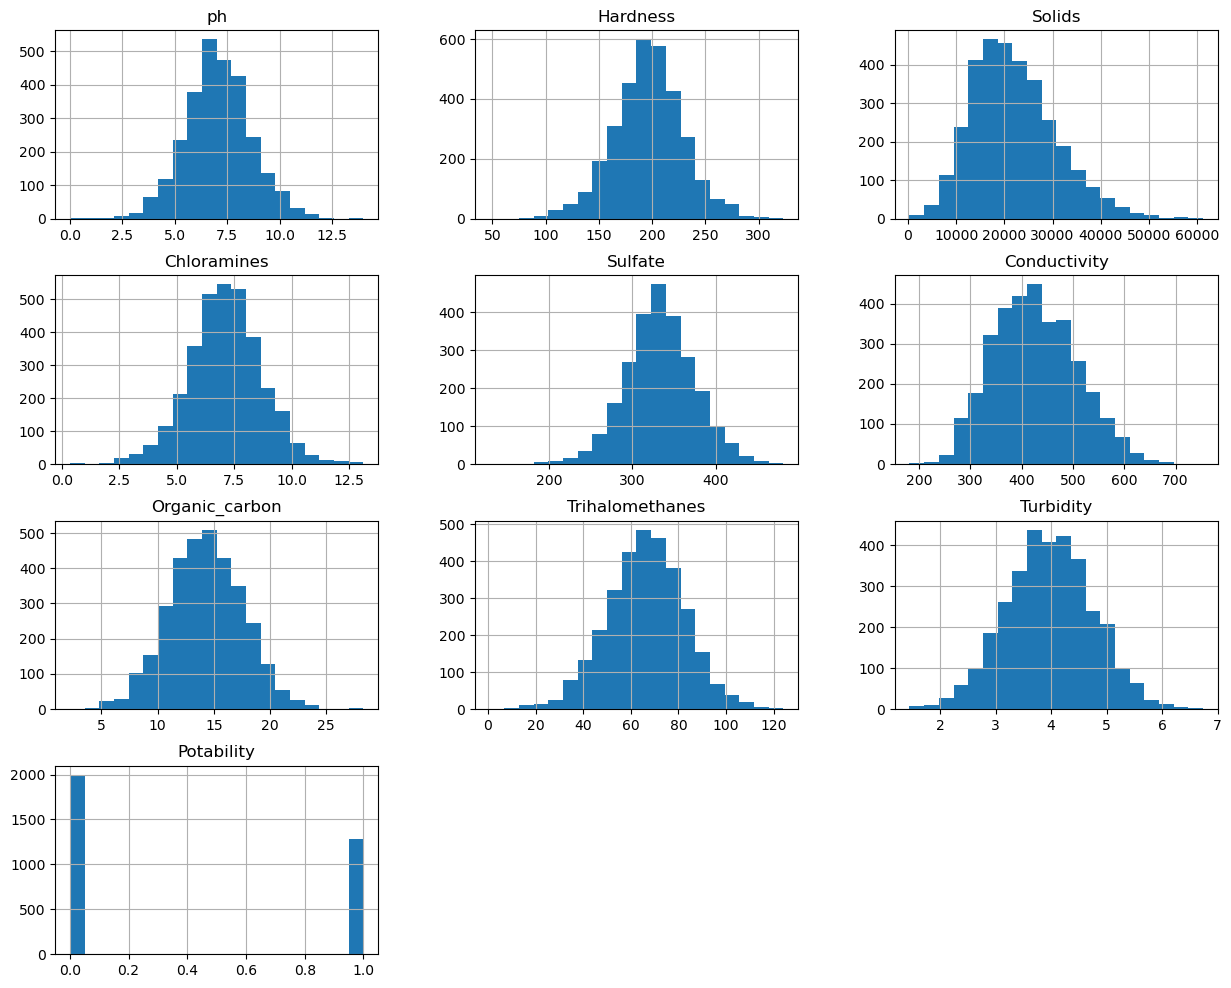

In [12]:
df.hist(figsize=(15,12),bins = 20);


In [13]:
# outlier check
def lowerupper(col):
    q1=np.quantile(col,.25)
    q3=np.quantile(col,.75)
    inter=q3-q1
    lowerbound=q1-(inter*1.5)
    upperbound=q3+(inter*1.5)
    outlier=[]
    for x in col:
        if((x>upperbound)or(x<lowerbound)):
            outlier.append(x)
    return outlier
col=df.columns
for i in col:
    outlier=lowerupper(df[i].values)
    print(len(outlier),"outliers are present in",i)


0 outliers are present in ph
83 outliers are present in Hardness
47 outliers are present in Solids
61 outliers are present in Chloramines
0 outliers are present in Sulfate
11 outliers are present in Conductivity
25 outliers are present in Organic_carbon
0 outliers are present in Trihalomethanes
19 outliers are present in Turbidity
0 outliers are present in Potability


In [14]:
# Data Preparation 

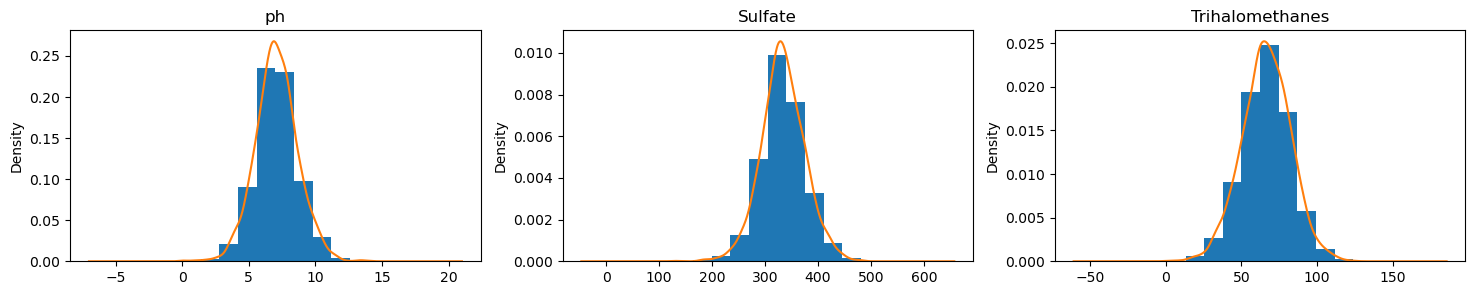

In [15]:

val_cols_names = ['ph','Sulfate','Trihalomethanes']
def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(1,3,figsize=(18,3))
    i = 0
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        i+=1
plot_histograms_density(df, val_cols_names)


<Axes: title={'center': 'Missing Values Per Feature After Imputation'}>

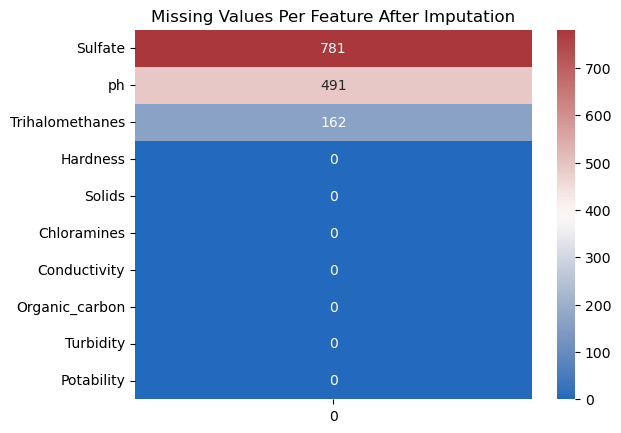

In [16]:
plt.title('Missing Values Per Feature After Imputation')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')


In [17]:

# Impute NaN values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed_values = imputer.fit_transform(df)

# Check for NaN values after imputation
print("Number of NaN values after imputation:")
print(pd.DataFrame(df_imputed_values, columns=df.columns).isna().sum())

# Create a DataFrame from the imputed values
df_imputed = pd.DataFrame(df_imputed_values, columns=df.columns)


# Display the first few rows of the scaled DataFrame
df_imputed.head()

Number of NaN values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0

<Axes: title={'center': 'Missing Values Per Feature After Imputation'}>

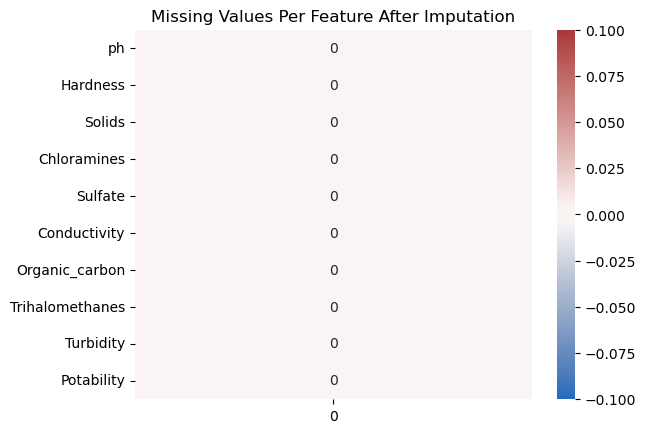

In [18]:
plt.title('Missing Values Per Feature After Imputation')
nans = df_imputed.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')


In [19]:
for col in df_imputed.columns:
    outliers = lowerupper(df_imputed[col].values)
    print(len(outliers), "outliers are present in", col)


142 outliers are present in ph
83 outliers are present in Hardness
47 outliers are present in Solids
61 outliers are present in Chloramines
264 outliers are present in Sulfate
11 outliers are present in Conductivity
25 outliers are present in Organic_carbon
54 outliers are present in Trihalomethanes
19 outliers are present in Turbidity
0 outliers are present in Potability


In [20]:
outlier_names = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

def replace_outliers_IQR(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low_lim = q1 - 1.5 * iqr
        high_lim = q3 + 1.5 * iqr
        print(f"High ({col}):", high_lim)
        print(f"Low ({col}):", low_lim)
        df[col] = np.where(df[col] >= high_lim, high_lim, np.where(df[col] <= low_lim, low_lim, df[col]))

# Assuming df_imputed is the DataFrame after imputation
replace_outliers_IQR(df_imputed, outlier_names)


High (ph): 10.258615434291345
Low (ph): 3.889106956840228
High (Hardness): 276.3928337208903
Low (Hardness): 117.12516037150485
High (Solids): 44831.86987314956
Low (Solids): -1832.4174487462951
High (Chloramines): 11.09608644703562
Low (Chloramines): 3.1462213405647073
High (Sulfate): 400.3224341668413
Low (Sulfate): 267.15795986167404
High (Conductivity): 655.8791400416264
Low (Conductivity): 191.64757856456453
High (Organic_carbon): 23.295426859188986
Low (Organic_carbon): 5.328026018267515
High (Trihalomethanes): 106.69503986064285
Low (Trihalomethanes): 26.619225158022296
High (Turbidity): 6.091233163793407
Low (Turbidity): 1.8487974931046152


In [21]:
# Scaling 
np_scaled = MinMaxScaler().fit_transform(df_imputed)

df_scaled = pd.DataFrame(np_scaled, columns = df_imputed.columns)
df_scaled.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.501089  0.551055  0.459896     0.522523  0.761153      0.802748   
1  0.000000  0.077214  0.411340     0.438878  0.500267      0.864305   
2  0.660964  0.672523  0.440085     0.771040  0.500267      0.488891   
3  0.695134  0.610596  0.487464     0.618012  0.673815      0.369684   
4  0.816879  0.401691  0.396713     0.427728  0.322742      0.445388   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.281162         0.753932   0.262665         0.0  
1        0.548326         0.371022   0.625079         0.0  
2        0.642308         0.497040   0.284538         0.0  
3        0.729571         0.920658   0.655278         0.0  
4        0.346753         0.067171   0.524764         0.0

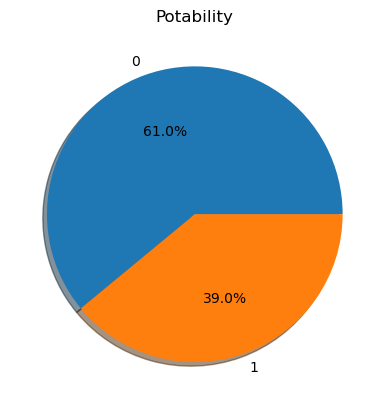

In [22]:
# plot pie for potability
plt.figure()
plt.title("Potability")
la=[0, 1]
plt.pie(df.groupby(df["Potability"]).size(),labels=la, autopct='%1.1f%%',shadow=True)
plt.show()


<Figure size 800x640 with 0 Axes>

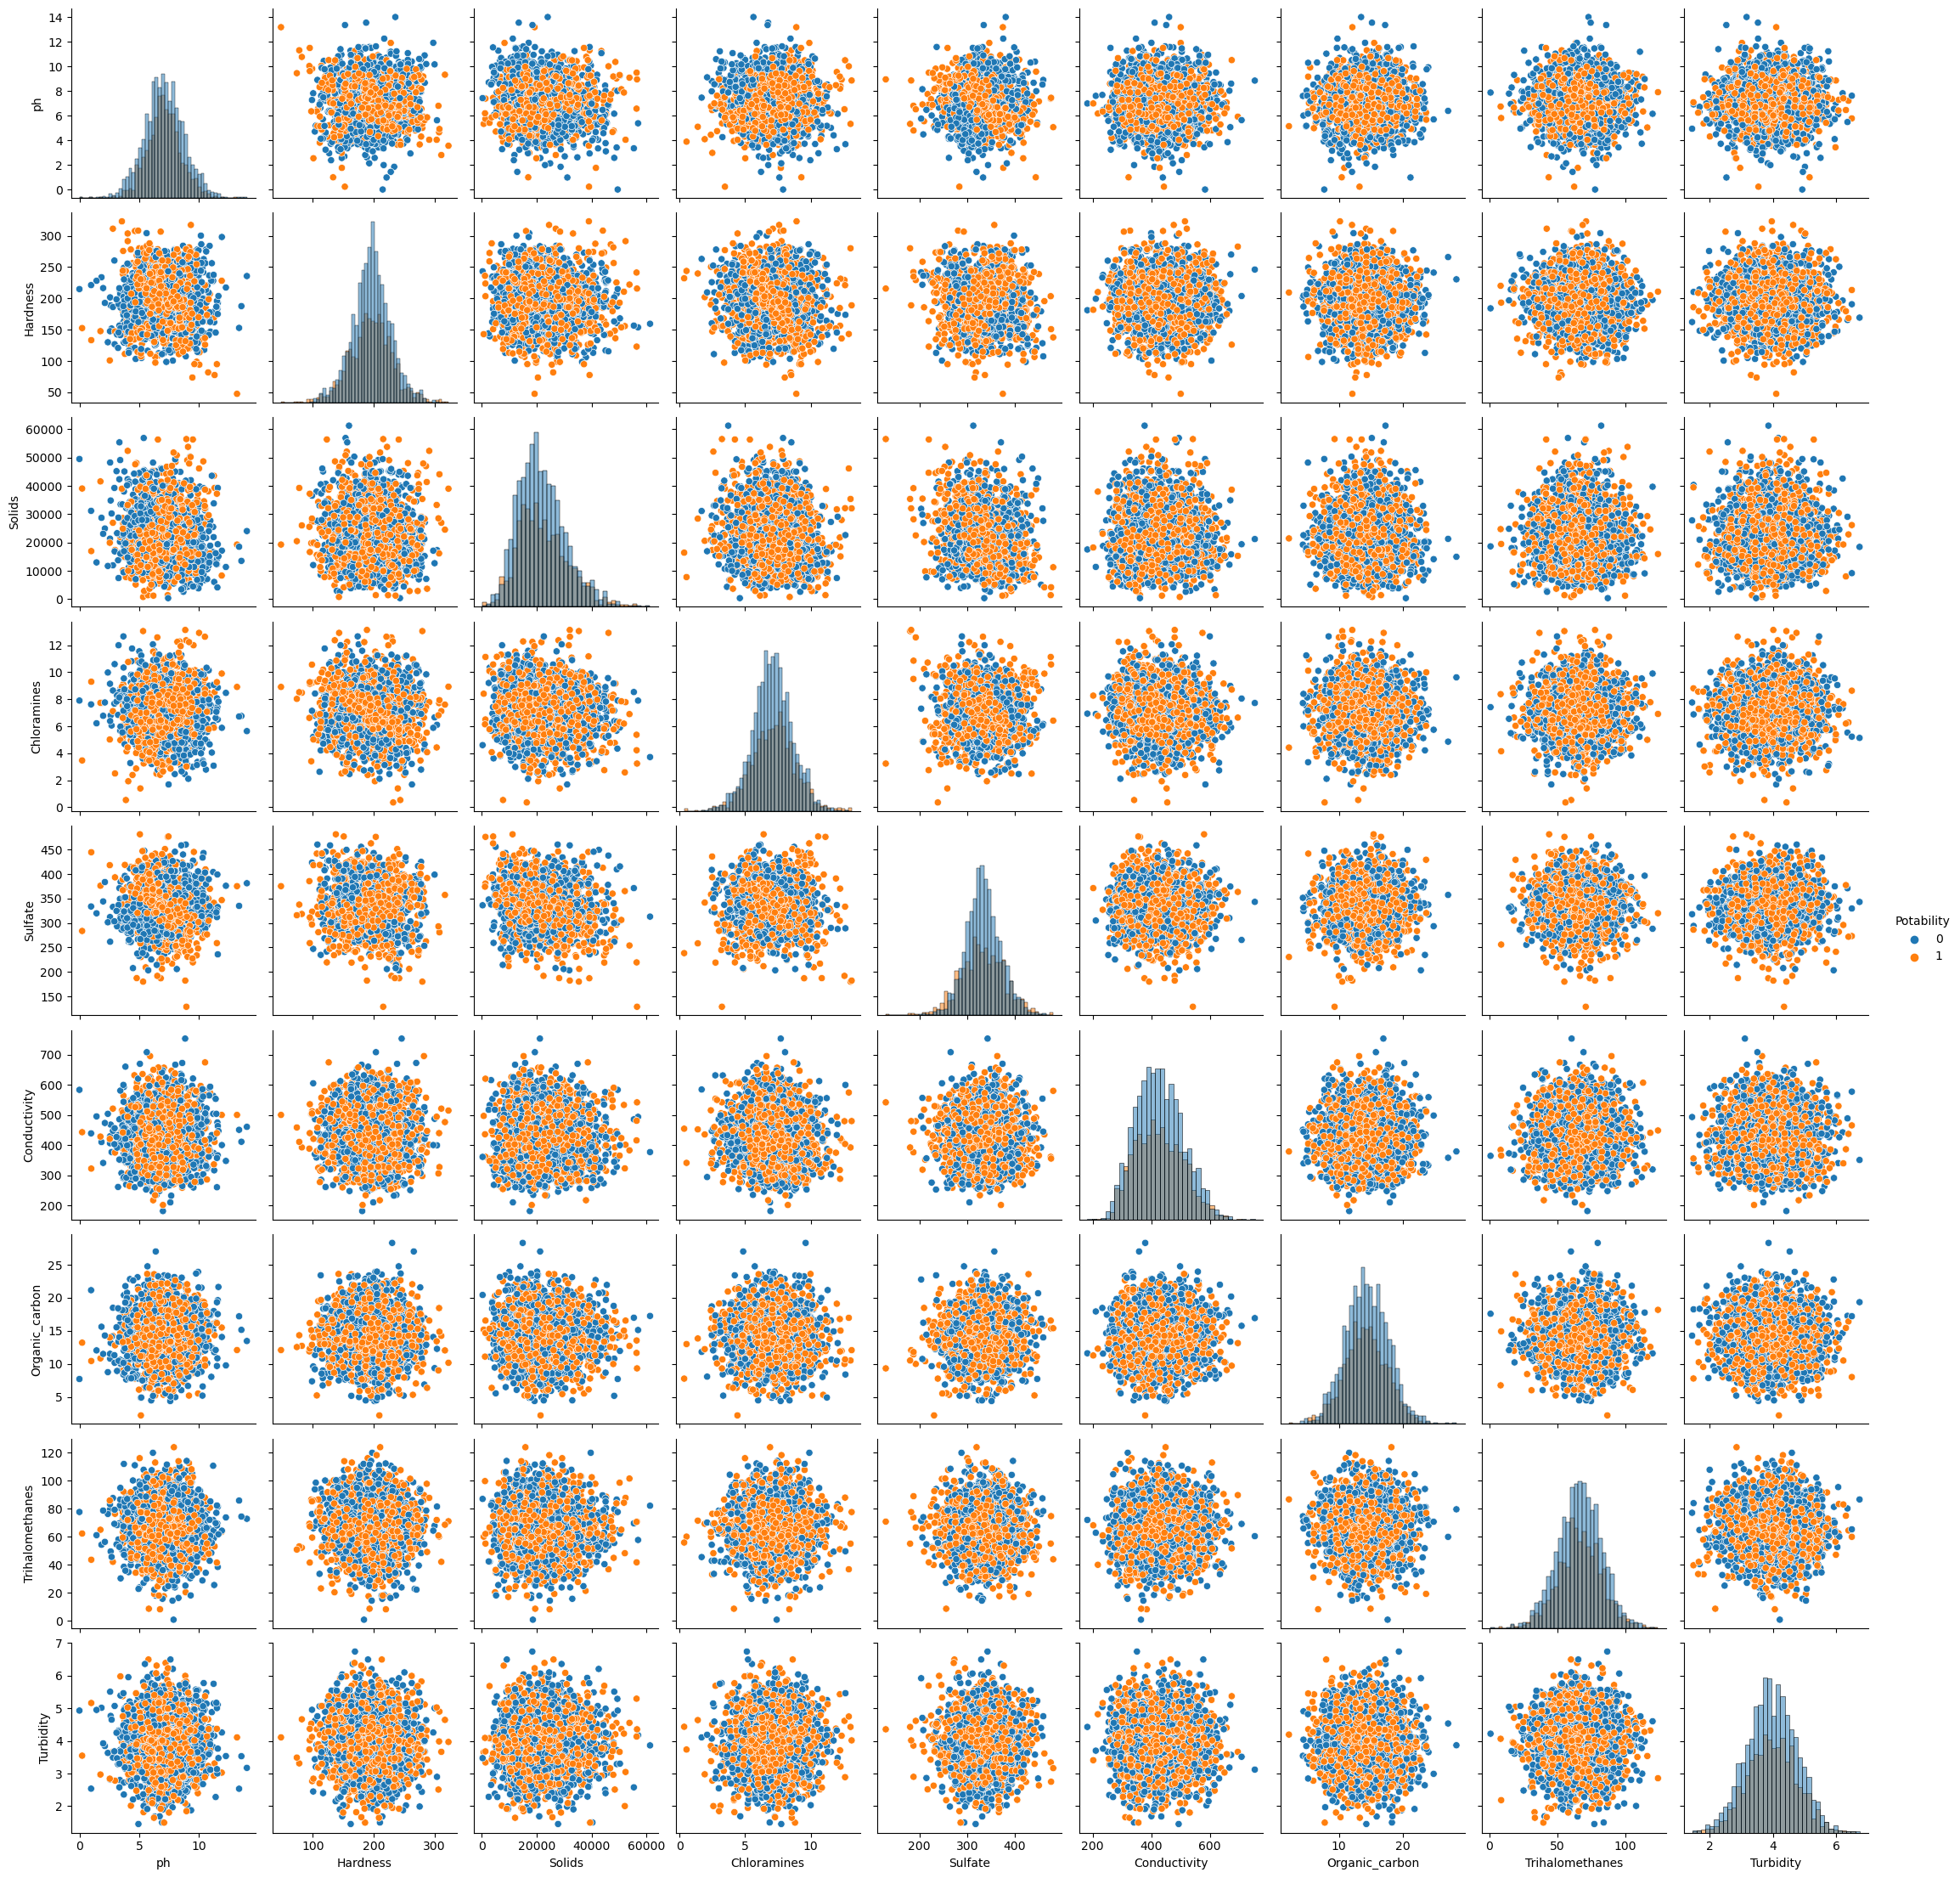

In [23]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, hue="Potability",diag_kind="hist")
plt.show()

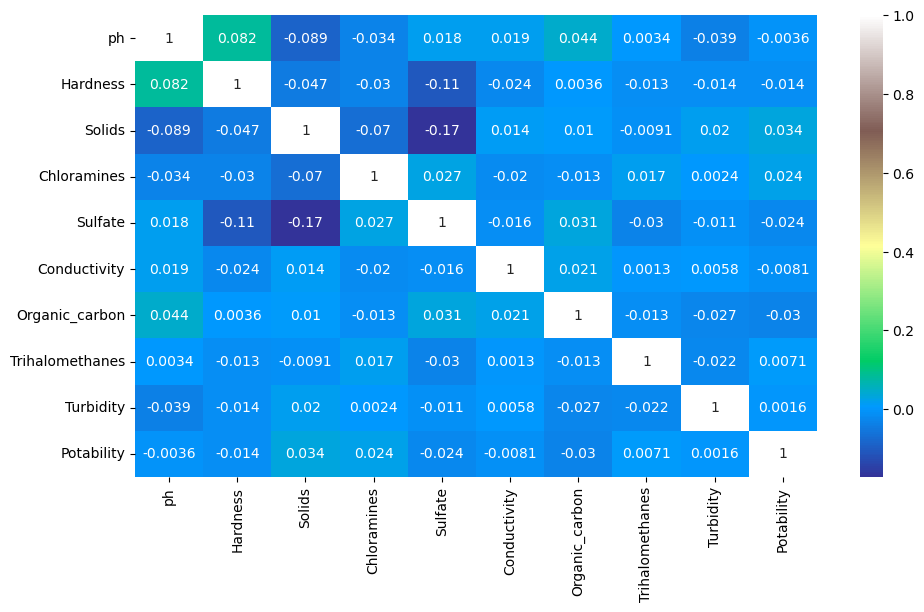

In [24]:
sns.heatmap(df.corr(),annot =True,cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(11,6)
plt.show()

In [25]:
#Splitting _data
X = df_imputed.drop('Potability',axis=1)
Y = df_imputed['Potability']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [27]:
X_train

ph    Hardness        Solids  Chloramines     Sulfate  \
1556  7.080795  158.207647  44831.869873     4.064878  267.157960   
1362  8.143483  182.432457  10673.582674     6.607835  333.775777   
2787  5.376078  185.540478  36026.401556     9.649943  343.486633   
1134  7.535700  221.792481  14829.745971     6.701159  366.412200   
1509  6.618187  164.254565  13776.621792     5.925462  333.775777   
...        ...         ...           ...          ...         ...   
1095  4.187491  208.374188  21809.709834     5.846112  327.474203   
1130  7.793915  164.958947  25506.912237     7.868036  358.259200   
1294  6.630364  186.761088  30939.023214     7.703481  333.775777   
860   8.783168  218.032840  16183.586649     7.390474  334.053885   
3174  6.698154  198.286268  34675.862845     6.263602  360.232834   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
1556    399.766965       16.086232        53.502086   4.108857  
1362    427.545219       13.719331        77.769334   2.572830  
2787    347.565066       14.004449        66.396293   3.629250  
1134    583.436488       17.731882        59.686076   4.208354  
1509    315.199393       12.082169        61.474423   3.797068  
...            ...             ...              ...        ...  
1095    264.508083       11.235144        46.682597   4.592959  
1130    398.460312       15.297496        66.396293   4.220028  
1294    330.876083       13.815757        86.753117   3.490588  
860     389.021616       16.354520        47.100982   4.274137  
3174    430.935009       12.176678        66.396293   3.758180  

[2194 rows x 9 columns]

In [28]:
#Decision_Tree

dt = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=9,splitter = 'best')
dt.fit(X_train,Y_train)
prediction_dt=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction_dt)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_dt)*100,'%')
confusion_matrix(prediction_dt,Y_test)

accuracy_score score     :  59.61182994454713 %


array([[461, 218],
       [219, 184]], dtype=int64)

Precision: 0.4566
Recall: 0.4577
F1 Score: 0.4571


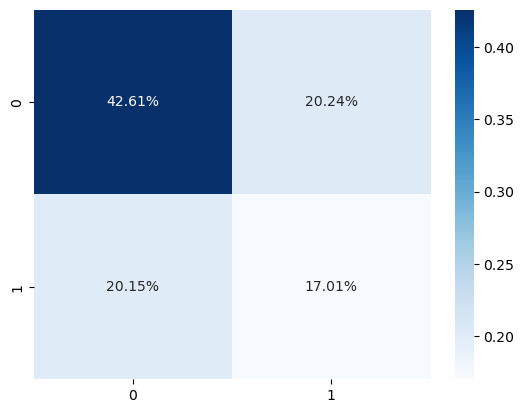

In [29]:
precision_dt = precision_score(Y_test,prediction_dt)
recall_dt = recall_score(Y_test,prediction_dt)
f1_dt = f1_score(Y_test,prediction_dt)
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
cm1 = confusion_matrix(Y_test, prediction_dt)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.show()


In [30]:
#Knn

knn=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 24, weights= 'uniform')
knn.fit(X_train,Y_train)
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_knn)*100,'%')

accuracy_score score     :  59.98151571164511 %


Precision: 0.3652
Recall: 0.1045
F1 Score: 0.1625


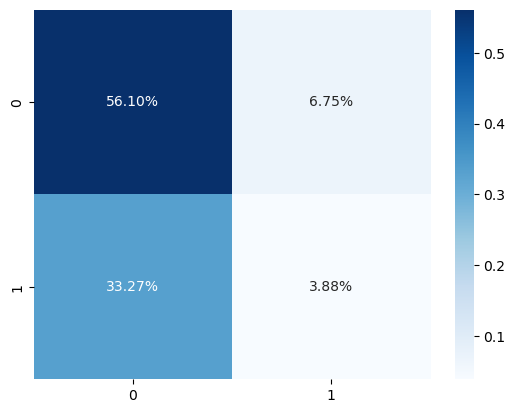

In [31]:
precision_knn = precision_score(Y_test,prediction_knn)
recall_knn = recall_score(Y_test,prediction_knn)
f1_knn = f1_score(Y_test,prediction_knn)
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
cm1 = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.show()


In [32]:
#Random Forrest

rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
rf.fit(X_train, Y_train)
prediction_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(Y_test,prediction_rf)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_rf)*100,'%')

accuracy_score score     :  62.84658040665434 %


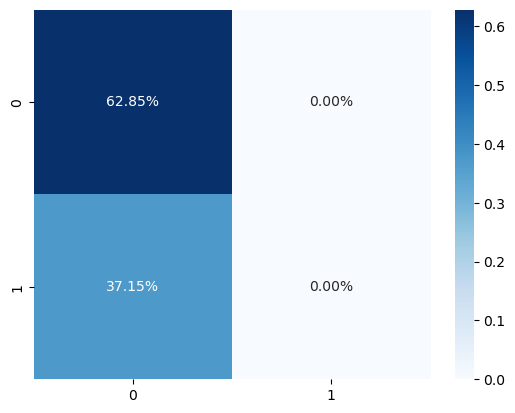

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       680
         1.0       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



In [33]:
warnings.filterwarnings("ignore")
cm3 = confusion_matrix(Y_test, prediction_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.show()
print(classification_report(Y_test,prediction_rf))

In [34]:
#Logistic regression
warnings.filterwarnings("ignore")
lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
lg.fit(X_train, Y_train)
prediction_lg=lg.predict(X_test)
accuracy_lg=accuracy_score(Y_test,prediction_lg)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_lg)*100,'%')



accuracy_score score     :  62.84658040665434 %


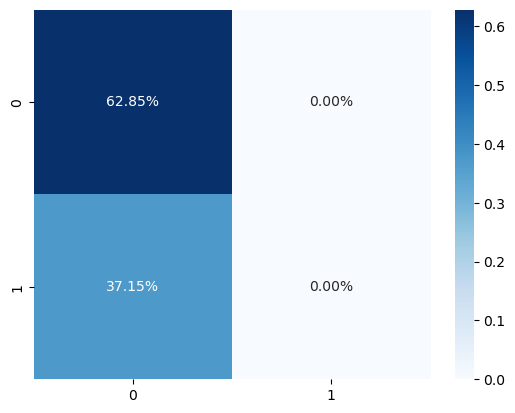

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       680
         1.0       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



In [35]:
cm1 = confusion_matrix(Y_test, prediction_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.show()

print(classification_report(Y_test,prediction_lg))


In [36]:
#XGBoost Classifier
xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
xgb.fit(X_train, Y_train)
prediction_xgb = xgb.predict(X_test)
accuracy_xgb=accuracy_score(Y_test,prediction_xgb)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_xgb)*100,'%')
print(classification_report(Y_test,prediction_xgb))

accuracy_score score     :  67.65249537892791 %
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       680
         1.0       0.61      0.36      0.45       402

    accuracy                           0.68      1082
   macro avg       0.65      0.61      0.61      1082
weighted avg       0.66      0.68      0.65      1082



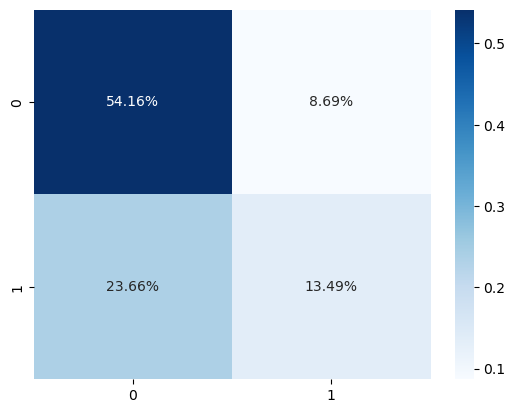

              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       680
         1.0       0.61      0.36      0.45       402

    accuracy                           0.68      1082
   macro avg       0.65      0.61      0.61      1082
weighted avg       0.66      0.68      0.65      1082



In [37]:
cm4 = confusion_matrix(Y_test, prediction_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.show()
print(classification_report(Y_test,prediction_xgb))

In [38]:
#Bagging



scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
scores

array([0.55640244, 0.57862595, 0.5648855 , 0.54656489, 0.59847328])

In [39]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=300, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, Y_train)
predictions_bag =bag_model.predict(X_test)
accuracy_bag = accuracy_score(Y_test, predictions_bag)*100
print('accuracy_score score     : ',accuracy_score(Y_test,predictions_bag)*100,'%')

accuracy_score score     :  67.9297597042514 %


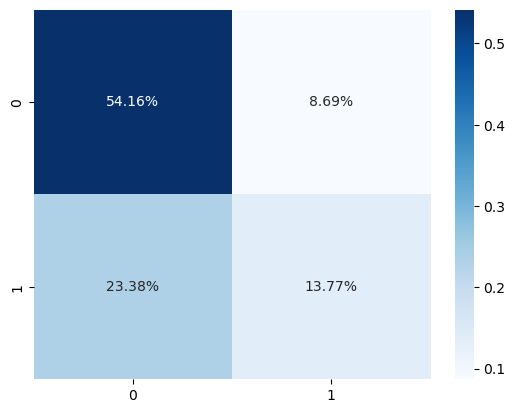

              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       680
         1.0       0.61      0.37      0.46       402

    accuracy                           0.68      1082
   macro avg       0.66      0.62      0.62      1082
weighted avg       0.67      0.68      0.66      1082



In [40]:
cm1 = confusion_matrix(Y_test, predictions_bag)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.show()

print(classification_report(Y_test,predictions_bag))

Model  Accuracy_score
5  Bagging Classifier        67.929760
4   XGBoost Classifier       67.652495
2  Logistic Regression       62.846580
3        Random Forest       62.846580
1                  KNN       59.981516
0        Decision Tree       59.611830

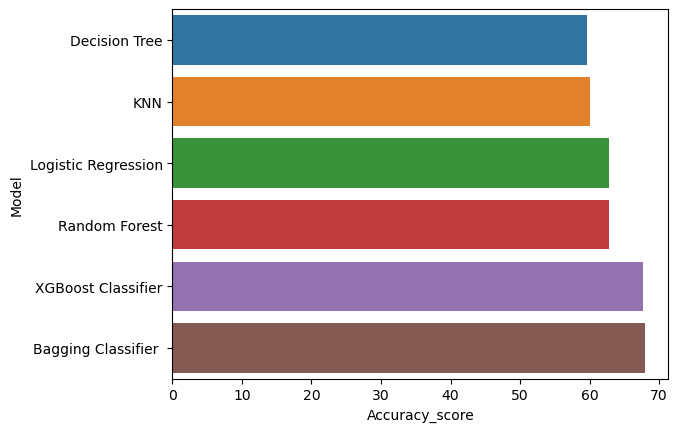

In [41]:
#Report After Model Optimization
models = pd.DataFrame({
    'Model':['Decision Tree', 'KNN', 'Logistic Regression', 'Random Forest','XGBoost Classifier' ,'Bagging Classifier '],
    'Accuracy_score' :[accuracy_dt,accuracy_knn,accuracy_lg, accuracy_rf, accuracy_xgb,accuracy_bag]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)